In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
from google.colab import files
from matplotlib.colors import LogNorm, Normalize

sns.set()

The dataset being explored is the cleaned "City of Pittsburgh Trees" dataset. We will investigate the benefits (in terms of dollar value) of different tree species and try to identify some patterns. Then, some intra-species investigation will be done, as well as some neighborhood-level explorations.

In [ ]:
df_trees = pd.read_csv("cleaned_tree_data_5.csv", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tree_stat = df_trees.groupby(["common_name"]).agg(["count", "mean"]).reset_index()

Only selected trees species with more than 10 datapoints to reduce the effect of outliers. 

In [ ]:
tree_stat = tree_stat[tree_stat["id"]["count"] >= 10]

In [ ]:
tree_stat.head(2)

common_name    id                ...   latitude longitude           
                 count          mean  ...       mean     count       mean
0  Amur Corktree    45  1.010417e+09  ...  40.452718        45 -79.934675
1   Amur Maackia    17  1.158984e+09  ...  40.447815        17 -79.963020

[2 rows x 97 columns]

Since there are many different tree species, only top 30 will be shown for each benefit category. The common names, instead of the scientific names, of the trees will be used since they are more recognizable. 

Top 30 tree species that provide the most stormwater benefits

In [ ]:
storm_water_benefit = tree_stat.sort_values([("stormwater_benefits_dollar_value","mean")])
storm_water_benefit = storm_water_benefit.tail(30)

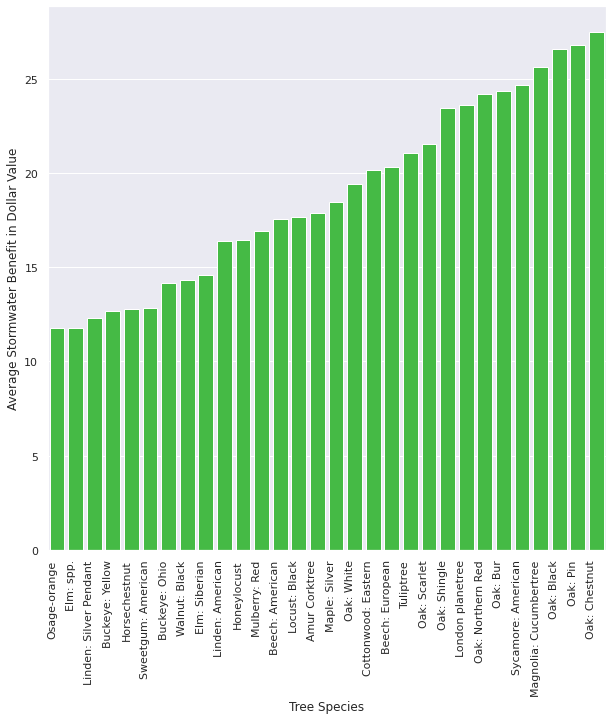

In [ ]:
storm_water_bar_plot = sns.barplot(x=storm_water_benefit["common_name"], y=storm_water_benefit["stormwater_benefits_dollar_value"]["mean"],color="limegreen")
storm_water_bar_plot.set_xticklabels(storm_water_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
storm_water_bar_plot.set_xlabel("Tree Species", fontsize = 12)
storm_water_bar_plot.set_ylabel("Average Stormwater Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Different oak species offered the most benefits. 

Top 30 tree species that provide the most property value benefits

In [ ]:
property_benefit = tree_stat.sort_values([("property_value_benefits_dollarvalue","mean")])
property_benefit = property_benefit.tail(30)

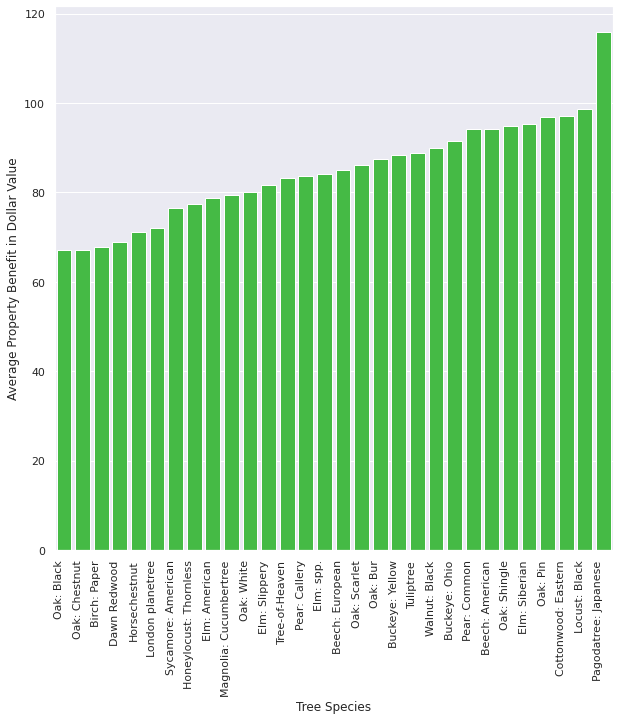

In [ ]:
property_benefit_bar_plot = sns.barplot(x=property_benefit["common_name"], y=property_benefit["property_value_benefits_dollarvalue"]["mean"], color="limegreen")
property_benefit_bar_plot.set_xticklabels(property_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
property_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
property_benefit_bar_plot.set_ylabel("Average Property Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Japanese Pagodatree and black locust trees provide the most property value benefits. 

Top 30 tree species that provide the most electricity saving benefits

In [ ]:
energy_benefit_elec = tree_stat.sort_values([("energy_benefits_electricity_dollar_value","mean")])
energy_benefit_elec = energy_benefit_elec.tail(30)

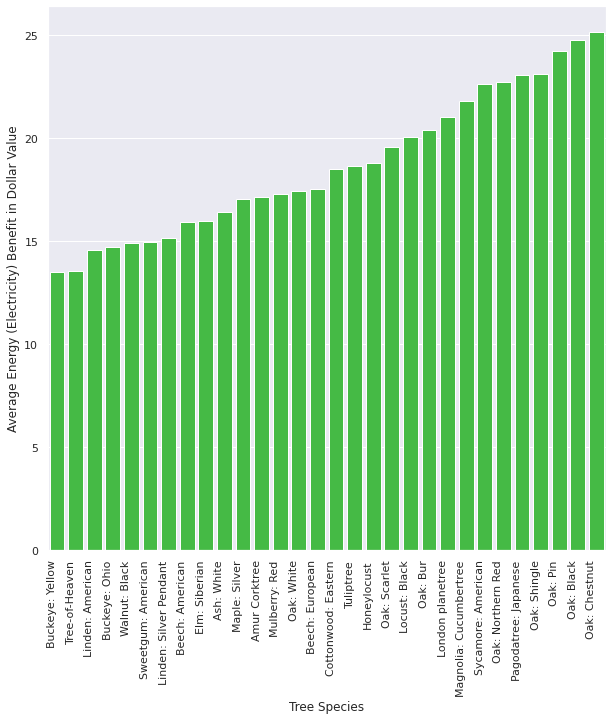

In [ ]:
energy_benefit_elec_bar_plot = sns.barplot(x=energy_benefit_elec["common_name"], y=energy_benefit_elec["energy_benefits_electricity_dollar_value"]["mean"], color="limegreen")
energy_benefit_elec_bar_plot.set_xticklabels(energy_benefit_elec_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
energy_benefit_elec_bar_plot.set_xlabel("Tree Species", fontsize = 12)
energy_benefit_elec_bar_plot.set_ylabel("Average Energy (Electricity) Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Top 30 tree species that provide the most gas saving benefits

In [ ]:
energy_benefit_gas = tree_stat.sort_values([("energy_benefits_gas_dollar_value","mean")])
energy_benefit_gas = energy_benefit_gas.tail(30)

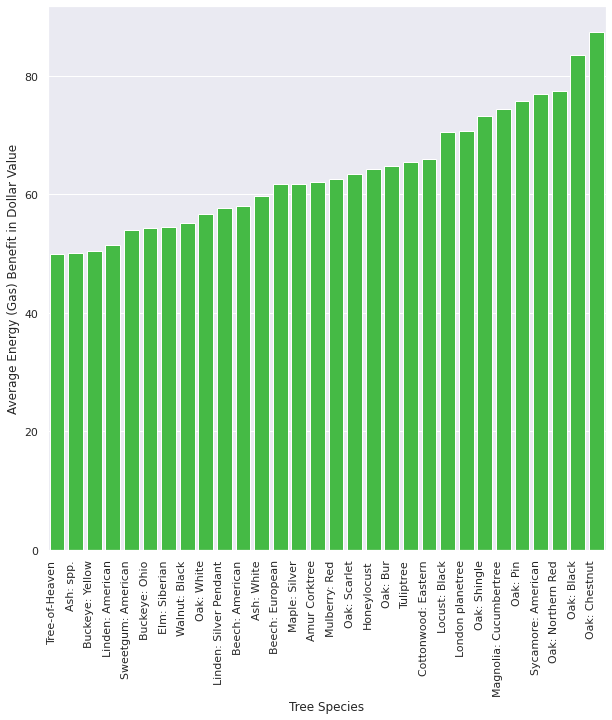

In [ ]:
energy_benefit_gas_bar_plot = sns.barplot(x=energy_benefit_gas["common_name"], y=energy_benefit_gas["energy_benefits_gas_dollar_value"]["mean"], color="limegreen")
energy_benefit_gas_bar_plot.set_xticklabels(energy_benefit_gas_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
energy_benefit_gas_bar_plot.set_xlabel("Tree Species", fontsize = 12)
energy_benefit_gas_bar_plot.set_ylabel("Average Energy (Gas) Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Oak trees provide the most energy-related benefits. 

Top 30 tree species that provide the most overall air quality benefits

In [ ]:
air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_total_dollar_value","mean")])
air_quality_total_benefit = air_quality_total_benefit.tail(30)

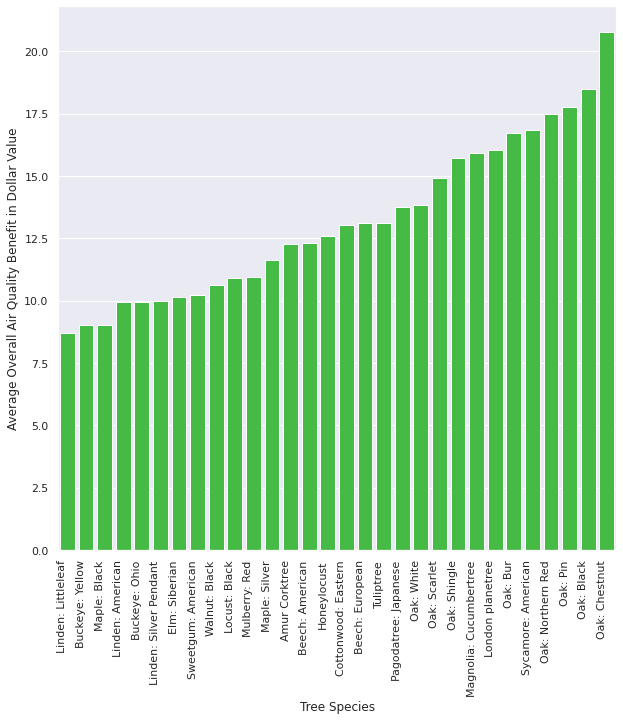

In [42]:
air_quality_total_benefit_bar_plot = sns.barplot(x=air_quality_total_benefit["common_name"], y=air_quality_total_benefit["air_quality_benfits_total_dollar_value"]["mean"], color="limegreen")
air_quality_total_benefit_bar_plot.set_xticklabels(air_quality_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
air_quality_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
air_quality_total_benefit_bar_plot.set_ylabel("Average Overall Air Quality Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There are many pollutants that can impact air quality, and trees provide values by decomposing or absorbing these chemicals. These pollutants include O3 (ozone), SO2(sulfur dioxide), NO2(nitrogen dioxide), and PM10. We can explore which trees provide the most values in terms of reducing these pollutants. 

In [ ]:
o3_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_o3dep_dollar_value","mean")])
o3_air_quality_total_benefit = o3_air_quality_total_benefit.tail(30)

Oak trees absorb the most O3 and offer the most benefit in dollar values. 

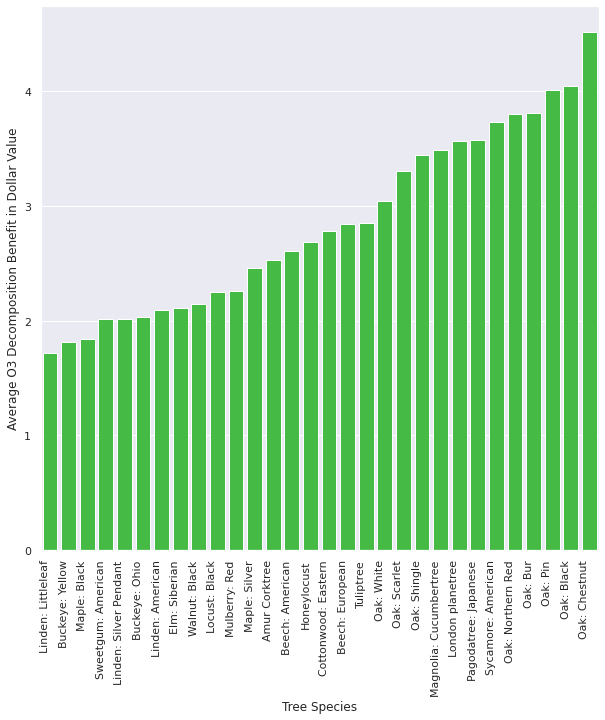

In [ ]:
o3_air_quality_total_benefit = sns.barplot(x=o3_air_quality_total_benefit["common_name"], y=o3_air_quality_total_benefit["air_quality_benfits_o3dep_dollar_value"]["mean"], color="limegreen")
o3_air_quality_total_benefit.set_xticklabels(o3_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
o3_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
o3_air_quality_total_benefit.set_ylabel("Average O3 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

In [ ]:
so2_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_so2dep_dollar_value","mean")])
so2_air_quality_total_benefit = so2_air_quality_total_benefit.tail(30)

Oak trees absorb the most SO2 and offer the most benefit in dollar values. 

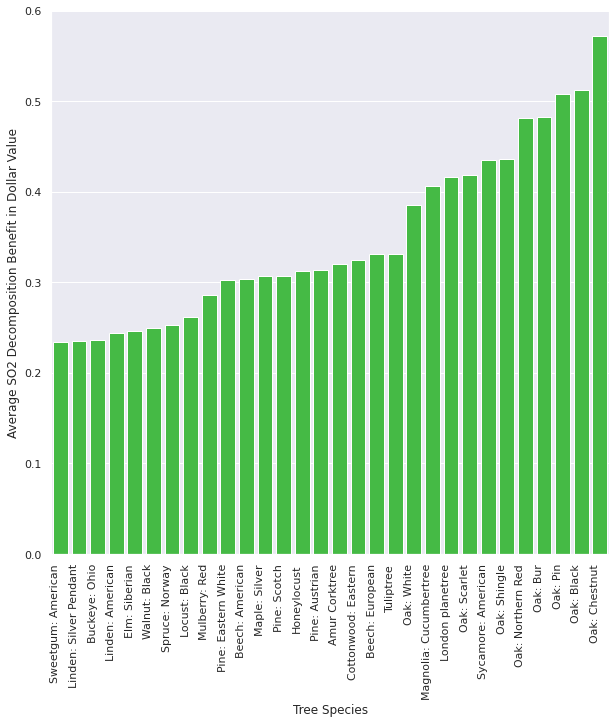

In [ ]:
so2_air_quality_total_benefit = sns.barplot(x=so2_air_quality_total_benefit["common_name"], y=so2_air_quality_total_benefit["air_quality_benfits_so2dep_dollar_value"]["mean"], color="limegreen")
so2_air_quality_total_benefit.set_xticklabels(so2_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
so2_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
so2_air_quality_total_benefit.set_ylabel("Average SO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

In [ ]:
no2_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_no2dep_dollar_value","mean")])
no2_air_quality_total_benefit = no2_air_quality_total_benefit.tail(30)

Surpringly, for NO2, Japanese Pegoda trees absorb and decompose the most and offer the most benefit in dollar values. 

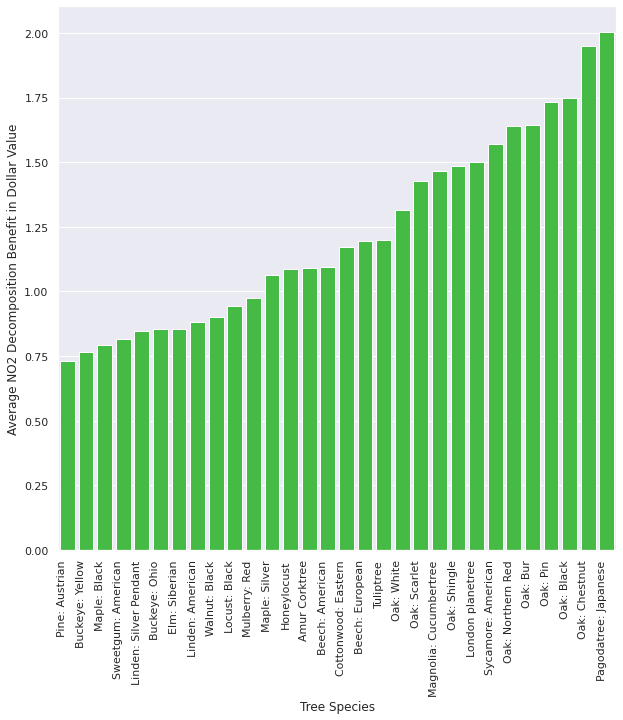

In [ ]:
no2_air_quality_total_benefit = sns.barplot(x=no2_air_quality_total_benefit["common_name"], y=no2_air_quality_total_benefit["air_quality_benfits_no2dep_dollar_value"]["mean"], color="limegreen")
no2_air_quality_total_benefit.set_xticklabels(no2_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
no2_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
no2_air_quality_total_benefit.set_ylabel("Average NO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

In [ ]:
pm10_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_pm10depdollar_value","mean")])
pm10_air_quality_total_benefit = pm10_air_quality_total_benefit.tail(30)

Once again oak trees provide the most benefits in terms of PM10 reduction.

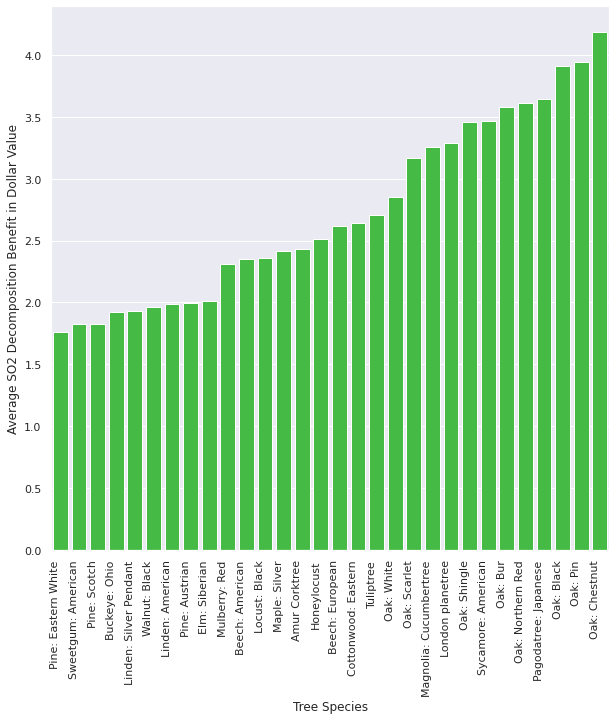

In [ ]:
pm10_air_quality_total_benefit = sns.barplot(x=pm10_air_quality_total_benefit["common_name"], y=pm10_air_quality_total_benefit["air_quality_benfits_pm10depdollar_value"]["mean"], color="limegreen")
pm10_air_quality_total_benefit.set_xticklabels(pm10_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
pm10_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
pm10_air_quality_total_benefit.set_ylabel("Average SO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Top 30 tree species that provide the most CO2 related benefits (CO2 sequester, CO2 reduction, etc.)

In [ ]:
co2_total_benefit = tree_stat.sort_values([("co2_benefits_dollar_value","mean")])
co2_total_benefit = co2_total_benefit.tail(30)

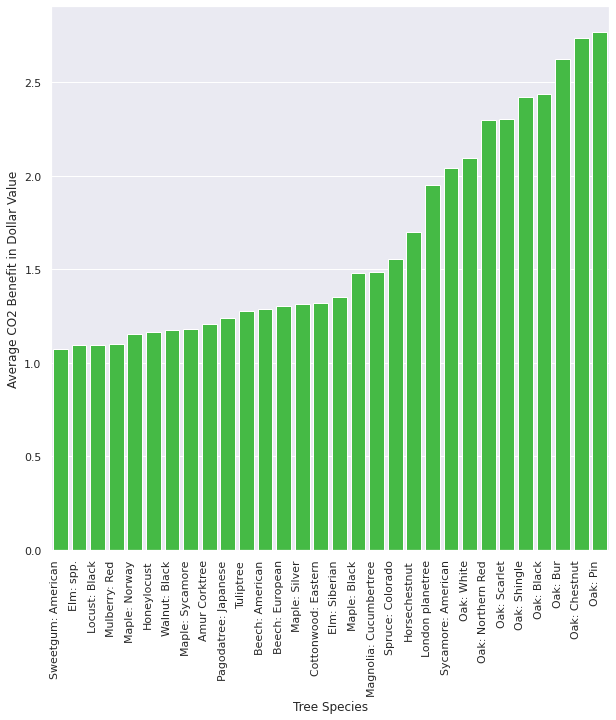

In [ ]:
co2_total_benefit_bar_plot = sns.barplot(x=co2_total_benefit["common_name"], y=co2_total_benefit["co2_benefits_dollar_value"]["mean"], color="limegreen")
co2_total_benefit_bar_plot.set_xticklabels(co2_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
co2_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
co2_total_benefit_bar_plot.set_ylabel("Average CO2 Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Top 30 tree species that provide overall the most benefits, with top 3 highlighted

In [ ]:
overall_total_benefit = tree_stat.sort_values([("overall_benefits_dollar_value","mean")])
overall_total_benefit = overall_total_benefit.tail(30)

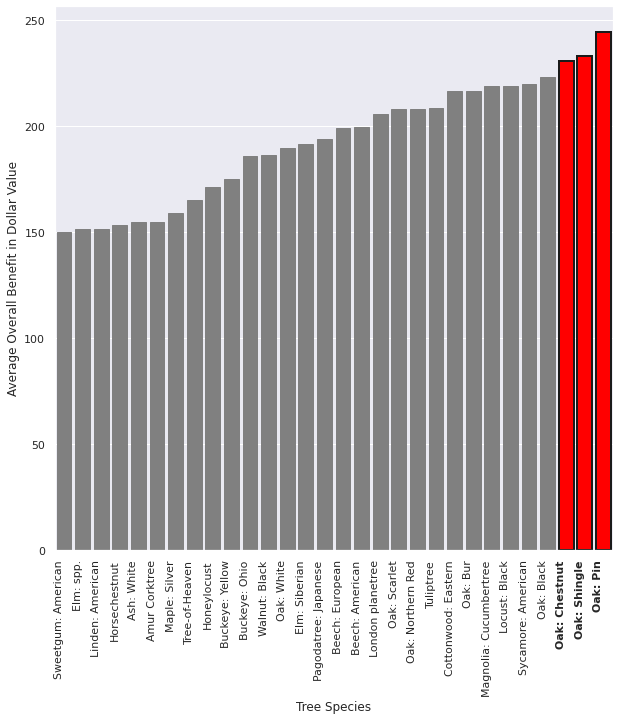

In [ ]:
overall_total_benefit_bar_plot = sns.barplot(x=overall_total_benefit["common_name"], y=overall_total_benefit["overall_benefits_dollar_value"]["mean"])
overall_total_benefit_bar_plot.set_xticklabels(overall_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
overall_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
overall_total_benefit_bar_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)
for bar in overall_total_benefit_bar_plot.patches:
    if bar.get_height() > 225:
        bar.set_color('red')    
    else:
        bar.set_color('grey')

for i,t in enumerate(overall_total_benefit_bar_plot.get_xticklabels()):
    if t.get_text() in ["Oak: Pin", "Oak: Shingle", "Oak: Chestnut"]:
        ## bold ticklabels
        t.set_weight("bold")
        ## bar edges
        overall_total_benefit_bar_plot.patches[i].set_edgecolor("k")
        overall_total_benefit_bar_plot.patches[i].set_linewidth(2)

Based on the exploration, it seems like different kinds of oak trees offer overall the most benefits. They also offer great benefits in the other categories explored too. Let's compare the different oak species more in-depth.

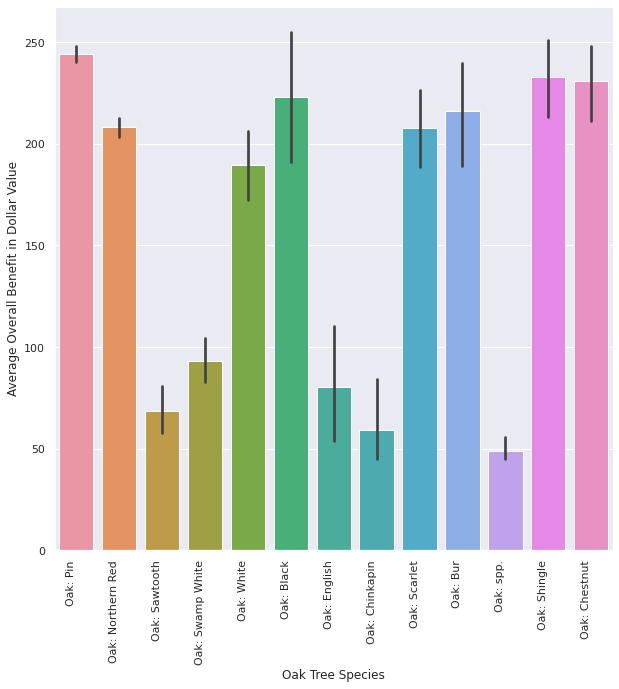

In [ ]:
oaks = df_trees[df_trees['common_name'].str.contains('Oak')]

#Again only take oaks species that contains more than 10 data points. 
oaks_count = oaks.groupby("common_name").agg("count").reset_index()
oaks_count = oaks_count[oaks_count["id"] >= 10]
oaks_selected = oaks_count["common_name"].unique()

oaks_to_plot = oaks[oaks.common_name.isin(oaks_selected)]
oaks_bar_plot = sns.barplot(x=oaks_to_plot["common_name"], y=oaks_to_plot["overall_benefits_dollar_value"])
oaks_bar_plot.set_xticklabels(oaks_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
oaks_bar_plot.set_xlabel("Oak Tree Species", fontsize = 12)
oaks_bar_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There is big variance in benefits between different oak species. We can build a heatmap to more easily notice the differences.

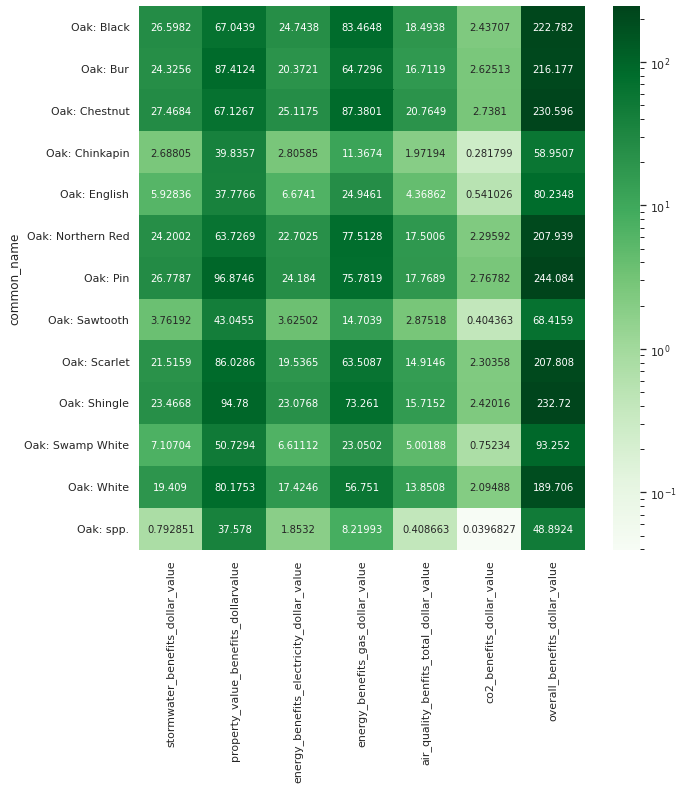

In [ ]:
oaks_group = oaks_to_plot.groupby("common_name").agg('mean')
grouped_oaks_plot = sns.heatmap(oaks_group[["stormwater_benefits_dollar_value","property_value_benefits_dollarvalue","energy_benefits_electricity_dollar_value","energy_benefits_gas_dollar_value","air_quality_benfits_total_dollar_value","co2_benefits_dollar_value", "overall_benefits_dollar_value"]], annot= True, fmt='g', xticklabels = True, yticklabels = True, cmap = 'Greens', norm=LogNorm())
plt.gcf().set_size_inches(10,10)

It is clear that some benefits, such as property value benefit, will be dependent on the neighborhood since the property prices can differ drastically. However, now we wonder if a tree will provide different values in different neighborhoods for things that should not be really neighborhood-dependent, such as energy-saving or air quality benefit. To investigate this, I picked the "Oak: Pin" tree as the candidate to graph because this tree species provided overall the most benefit, as shown by explorations done above. 

In [ ]:
oak_tree_neighborhood = df_trees[df_trees["common_name"] == "Oak: Pin"]

In [ ]:
oak_tree_neighborhood = oak_tree_neighborhood.groupby("neighborhood").agg(["mean", "count"])

In [ ]:
oak_tree_neighborhood = oak_tree_neighborhood[oak_tree_neighborhood["id"]["count"] >= 10]
oak_tree_neighborhood = oak_tree_neighborhood.reset_index()

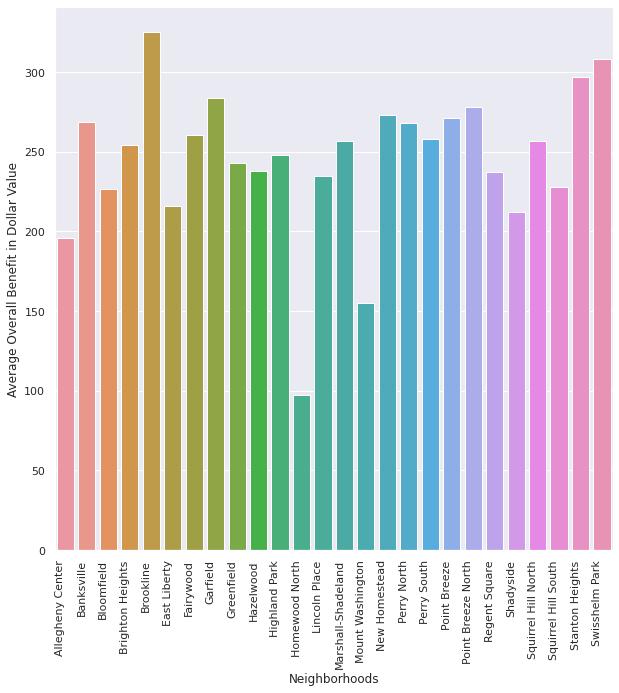

In [ ]:
neighborhood_diff_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["overall_benefits_dollar_value"]["mean"])
neighborhood_diff_plot.set_xticklabels(neighborhood_diff_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Surprisingly there are big differences between neighborhoods in terms of the overall benefit provided by this tree species. However, this might be purely because of the difference in property benefits, so we need more investigation into some of the sub-categories of overall benefits. 

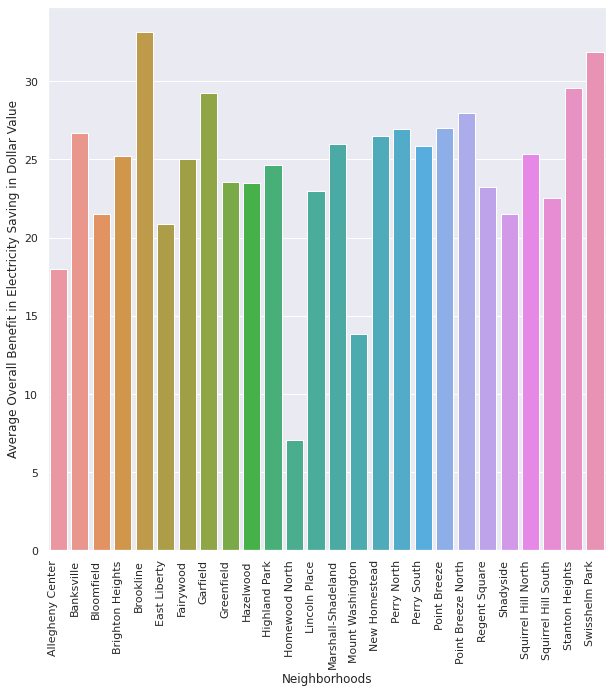

In [ ]:
neighborhood_diff_electricity_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["energy_benefits_electricity_dollar_value"]["mean"])
neighborhood_diff_electricity_plot.set_xticklabels(neighborhood_diff_electricity_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_electricity_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_electricity_plot.set_ylabel("Average Overall Benefit in Electricity Saving in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

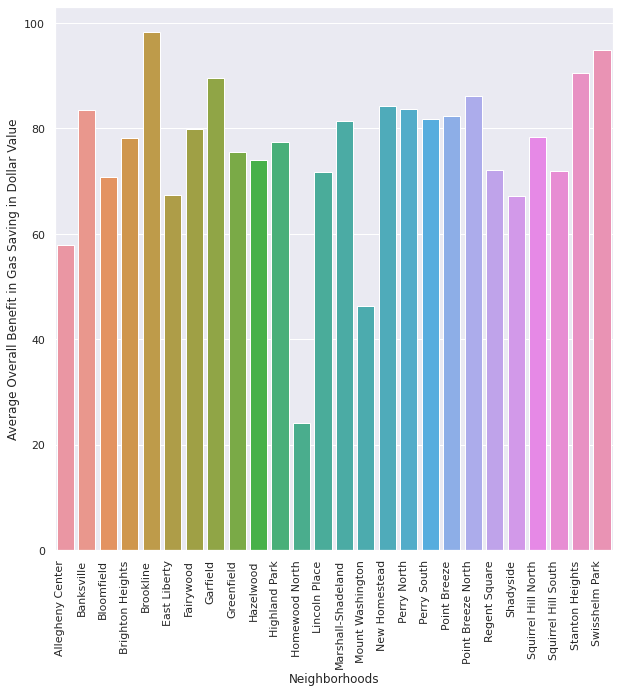

In [ ]:
neighborhood_diff_gas_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["energy_benefits_gas_dollar_value"]["mean"])
neighborhood_diff_gas_plot.set_xticklabels(neighborhood_diff_gas_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_gas_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_gas_plot.set_ylabel("Average Overall Benefit in Gas Saving in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There are big variance in energy saving benefits acorss neighborhoods as well. 

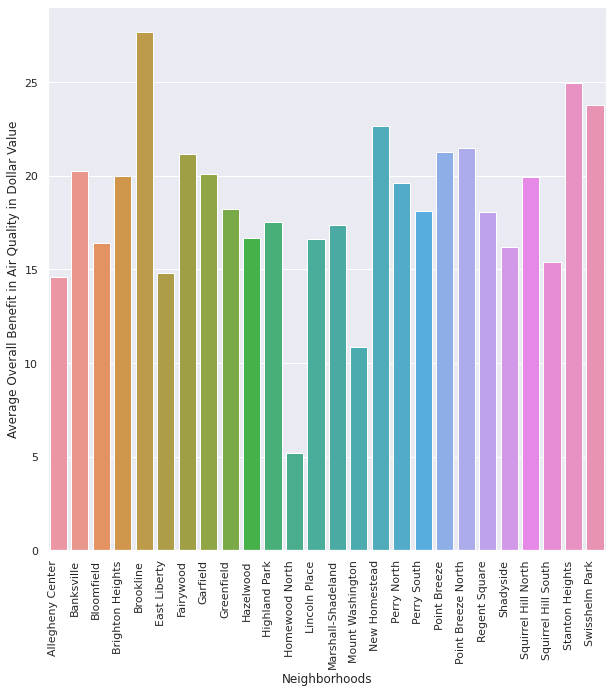

In [ ]:
neighborhood_diff_air_q_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["air_quality_benfits_total_dollar_value"]["mean"])
neighborhood_diff_air_q_plot.set_xticklabels(neighborhood_diff_air_q_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_air_q_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_air_q_plot.set_ylabel("Average Overall Benefit in Air Quality in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

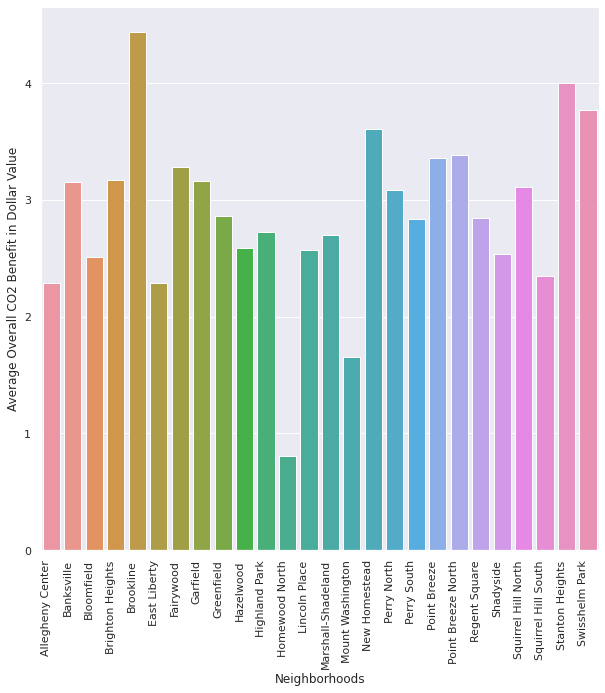

In [ ]:
neighborhood_diff_co2_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["co2_benefits_dollar_value"]["mean"])
neighborhood_diff_co2_plot.set_xticklabels(neighborhood_diff_co2_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_co2_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_co2_plot.set_ylabel("Average Overall CO2 Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

The most surprising finding is that air quality benefits and co2 benefits which should be the least dependent on neighborhoods also show significant variance across the different neighborhoods. Since all of the neighborhoods are located in Pittsburgh, there should not be a drastic difference in air quality across such a small geographical region over the long term. These two graphs also showed a very similar distribution and a strong correlation. 

All of these graphs combined also indicate that some neighborhoods are consistently receiving fewer benefits compared to others, while some are consistently receiving more benefits. 

Potential Research Question to explore further:

1. Why are there such big differences in the benefits provided across different neighborhoods for the same tree species? What factors could be contributing to this? 

2. On the other hand, is this difference correlated to some of the neighborhoods that are at a disadvantage? If so, how much? In other words, is tree-inequality correlated to things like lower incomes or lower levels of educational attainment? Is tree equality across neighborhoods something that urban planners and policymakers should focus on? 
